In [ ]:

gpu=2
CUDA_VISIBLE_DEVICES=gpu
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tqdm


import os
import glob
import random
import itertools
import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import scipy
from scipy.interpolate import interp1d

from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 37.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is 

In [ ]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
import pandas as pd

In [ ]:
path = Path('/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/')
path.ls()

(#7) [Path('/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample_labels.csv'),Path('/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/densenet121.pth'),Path('/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/densenet.hdf5'),Path('/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample'),Path('/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample_labels_binaryClass.gsheet'),Path('/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample_labels_new.csv'),Path('/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/cleaned_data.csv')]

In [ ]:
df = pd.read_csv(path/f"sample_labels.csv")
df.head()

Image Index                                          Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneumothorax   
1  00000013_026.png                                  Cardiomegaly|Emphysema   
2  00000017_001.png                                              No Finding   
3  00000030_001.png                                             Atelectasis   
4  00000032_001.png                             Cardiomegaly|Edema|Effusion   

   Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0            5          13        060Y              M            AP   
1           26          13        057Y              M            AP   
2            1          17        077Y              M            AP   
3            1          30        079Y              M            PA   
4            1          32        055Y              F            AP   

   OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  \
0                3056                 2544                        0.139   
1                2500                 2048                        0.168   
2                2500                 2048                        0.168   
3                2992                 2991                        0.143   
4                2500                 2048                        0.168   

   OriginalImagePixelSpacing_y  
0                        0.139  
1                        0.168  
2                        0.168  
3                        0.143  
4                        0.168

In [ ]:
import pandas as pd

# Assume df is your DataFrame
# Columns to keep
columns_to_keep = ["Image Index", "Finding Labels"]

# Drop all other columns
df = df[columns_to_keep]
df.rename(columns={"Image Index": "Image"}, inplace=True)

df.head()

SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [ ]:
df.head()

Image                                          Finding Labels
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneumothorax
1  00000013_026.png                                  Cardiomegaly|Emphysema
2  00000017_001.png                                              No Finding
3  00000030_001.png                                             Atelectasis
4  00000032_001.png                             Cardiomegaly|Edema|Effusion

In [ ]:
dblock = DataBlock()

In [ ]:
dsets = dblock.datasets(df)
dsets

(#5606) [(Image                                                   00000013_005.png
Finding Labels    Emphysema|Infiltration|Pleural_Thickening|Pneumothorax
Name: 0, dtype: object, Image                                                   00000013_005.png
Finding Labels    Emphysema|Infiltration|Pleural_Thickening|Pneumothorax
Name: 0, dtype: object),(Image                   00000013_026.png
Finding Labels    Cardiomegaly|Emphysema
Name: 1, dtype: object, Image                   00000013_026.png
Finding Labels    Cardiomegaly|Emphysema
Name: 1, dtype: object),(Image             00000017_001.png
Finding Labels          No Finding
Name: 2, dtype: object, Image             00000017_001.png
Finding Labels          No Finding
Name: 2, dtype: object),(Image             00000030_001.png
Finding Labels         Atelectasis
Name: 3, dtype: object, Image             00000030_001.png
Finding Labels         Atelectasis
Name: 3, dtype: object),(Image                        00000032_001.png
Finding Labe

In [ ]:
def get_x(r): return path/'sample/images'/r['Image']
def get_y(r): return r['Finding Labels'].split('|')
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
    get_x = get_x,
    get_y = get_y,
    splitter = RandomSplitter(),
    batch_tfms = [*aug_transforms(size= 224),Normalize.from_stats(*imagenet_stats)])

dls = dblock.dataloaders(df)


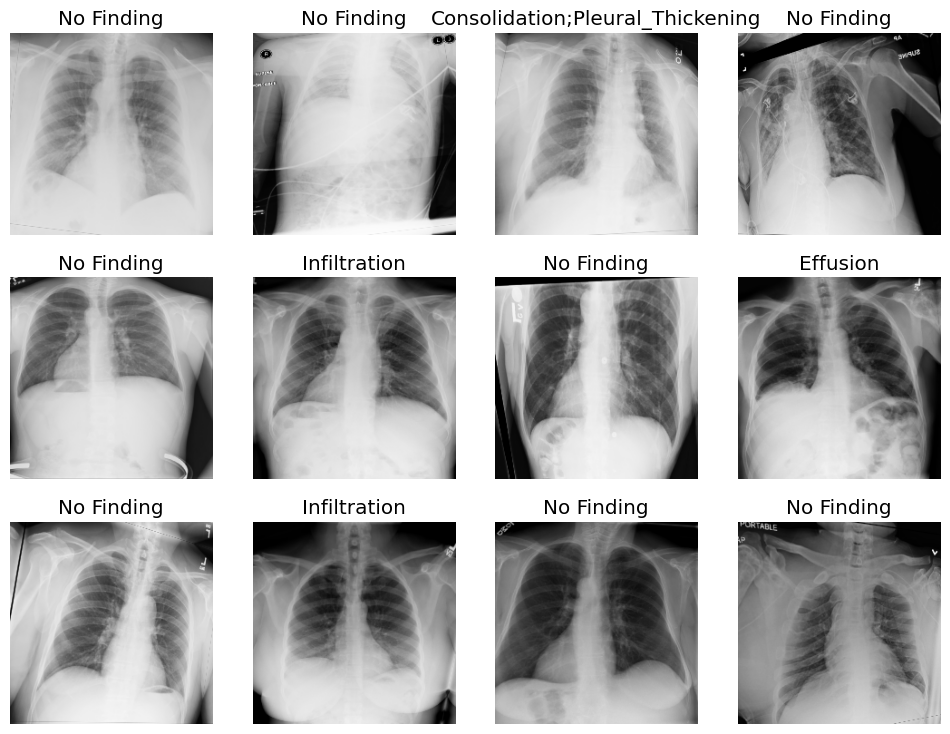

In [ ]:
dls.show_batch(max_n=12)

In [ ]:
# List all files in the directory
files = os.listdir(path/'sample/images')

# Filter out the files that are images (assuming common image formats)
image_extensions = ['.png']
images = [file for file in files if any(file.lower().endswith(ext) for ext in image_extensions)]

# Count the number of images
num_images = len(images)
print(f"Total number of images: {num_images}")

Total number of images: 5606


In [ ]:
import os
import pandas as pd

# Load the dataset

path_to_images = path/'sample/images'



# Print the column names to verify
print("Columns in the CSV file:", df.columns)

# Show initial counts
print(f"Initial number of images in CSV: {len(df)}")

# Check if the 'Image' column exists
if 'Image' not in df.columns:
    raise KeyError("The 'Image' column is not present in the CSV file. Please check the column names.")

# Check if images exist and filter out invalid entries
def image_exists(image_path):
    return os.path.exists(image_path)

# Construct full image paths, creating a copy of the DataFrame to avoid the error
df_copy = df.copy()  # Create a copy of the DataFrame
df_copy['ImageFullPath'] = df_copy['Image'].apply(lambda x: os.path.join(path_to_images, x))

# Print first few entries to check paths
print("First few image paths in the DataFrame:")
print(df_copy['ImageFullPath'].head())

# Filter the DataFrame
valid_data = df_copy[df_copy['ImageFullPath'].apply(image_exists)]

# Show the counts after filtering
print(f"Number of valid images in CSV after filtering: {len(valid_data)}")

# Print first few valid entries to check paths
print("First few valid image paths in the DataFrame:")
print(valid_data['ImageFullPath'].head())

# Save the cleaned dataframe back to a new CSV file
valid_data.drop(columns=['ImageFullPath'], inplace=True)
valid_data.to_csv('cleaned_data.csv', index=False)

print("Cleaned dataset saved to 'cleaned_data.csv'.")

Columns in the CSV file: Index(['Image', 'Finding Labels'], dtype='object')
Initial number of images in CSV: 5606
First few image paths in the DataFrame:
0    /content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample/images/00000013_005.png
1    /content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample/images/00000013_026.png
2    /content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample/images/00000017_001.png
3    /content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample/images/00000030_001.png
4    /content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample/images/00000032_001.png
Name: ImageFullPath, dtype: object
Number of valid images in CSV after filtering: 5606
First few valid image paths in the DataFrame:
0    /content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample/images/00000013_005.png
1    /content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample/images/00000013_026.png
2    /content/gdrive/MyDrive/NIH_chestxra

In [ ]:
df1=pd.read_csv('/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/cleaned_data.csv')

In [ ]:
df1.shape

(5606, 2)

In [ ]:
df1.head()

Image                                          Finding Labels
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneumothorax
1  00000013_026.png                                  Cardiomegaly|Emphysema
2  00000017_001.png                                              No Finding
3  00000030_001.png                                             Atelectasis
4  00000032_001.png                             Cardiomegaly|Edema|Effusion

In [ ]:
import pandas as pd


# Verify if 'Finding Labels' is present
if 'Finding Labels' not in df1.columns:
    raise KeyError("The 'Finding Labels' column is missing. Please check 'cleaned_data.csv'.")

Labels = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Nodule', 'Pneumothorax',
          'Atelectasis', 'Pleural_Thickening', 'Mass', 'Edema', 'Consolidation',
          'Infiltration', 'Fibrosis', 'Pneumonia']

df_copy = df1.copy()  # Create a copy of the loaded DataFrame

# Modify the copy instead of the original
for label in Labels:
    df_copy[label] = df_copy['Finding Labels'].apply(lambda x: 1 if label in x else 0)

df_copy['No Findings'] = df_copy['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

# Now you can proceed with further operations on df_copy

In [ ]:
df_copy.head()


Image                                          Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneumothorax   
1  00000013_026.png                                  Cardiomegaly|Emphysema   
2  00000017_001.png                                              No Finding   
3  00000030_001.png                                             Atelectasis   
4  00000032_001.png                             Cardiomegaly|Edema|Effusion   

   Cardiomegaly  Emphysema  Effusion  Hernia  Nodule  Pneumothorax  \
0             0          1         0       0       0             1   
1             1          1         0       0       0             0   
2             0          0         0       0       0             0   
3             0          0         0       0       0             0   
4             1          0         1       0       0             0   

   Atelectasis  Pleural_Thickening  Mass  Edema  Consolidation  Infiltration  \
0            0                   1     0      0              0             1   
1            0                   0     0      0              0             0   
2            0                   0     0      0              0             0   
3            1                   0     0      0              0             0   
4            0                   0     0      1              0             0   

   Fibrosis  Pneumonia  No Findings  
0         0          0            0  
1         0          0            0  
2         0          0            1  
3         0          0            0  
4         0          0            0

In [ ]:
# Previous code where you created df_copy and modified it

# Instead of assigning back to df1, continue using df_copy
df_copy.drop(columns=["Finding Labels"], inplace=True)
df_copy.head()

Image  Cardiomegaly  Emphysema  Effusion  Hernia  Nodule  \
0  00000013_005.png             0          1         0       0       0   
1  00000013_026.png             1          1         0       0       0   
2  00000017_001.png             0          0         0       0       0   
3  00000030_001.png             0          0         0       0       0   
4  00000032_001.png             1          0         1       0       0   

   Pneumothorax  Atelectasis  Pleural_Thickening  Mass  Edema  Consolidation  \
0             1            0                   1     0      0              0   
1             0            0                   0     0      0              0   
2             0            0                   0     0      0              0   
3             0            1                   0     0      0              0   
4             0            0                   0     0      1              0   

   Infiltration  Fibrosis  Pneumonia  No Findings  
0             1         0          0            0  
1             0         0          0            0  
2             0         0          0            1  
3             0         0          0            0  
4             0         0          0            0

In [ ]:
df1=df_copy

In [ ]:
df1.head()

Image  Cardiomegaly  Emphysema  Effusion  Hernia  Nodule  \
0  00000013_005.png             0          1         0       0       0   
1  00000013_026.png             1          1         0       0       0   
2  00000017_001.png             0          0         0       0       0   
3  00000030_001.png             0          0         0       0       0   
4  00000032_001.png             1          0         1       0       0   

   Pneumothorax  Atelectasis  Pleural_Thickening  Mass  Edema  Consolidation  \
0             1            0                   1     0      0              0   
1             0            0                   0     0      0              0   
2             0            0                   0     0      0              0   
3             0            1                   0     0      0              0   
4             0            0                   0     0      1              0   

   Infiltration  Fibrosis  Pneumonia  No Findings  
0             1         0          0            0  
1             0         0          0            0  
2             0         0          0            1  
3             0         0          0            0  
4             0         0          0            0

In [ ]:
# Split the data into 70% train, 20% test, and 10% validation sets
train_df, temp_df = train_test_split(df1, test_size=0.3, random_state=42)  # 30% for test and validation
val_df, test_df = train_test_split(temp_df, test_size=2/3, random_state=42)  # 2/3 of 30% = 20%, 1/3 of 30% = 10%

# Display the sizes of each set
print(f"Total samples: {len(df1)}")
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

Total samples: 5606
Training samples: 3924
Validation samples: 560
Test samples: 1122


The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.3671 and the standard deviation is 0.1762


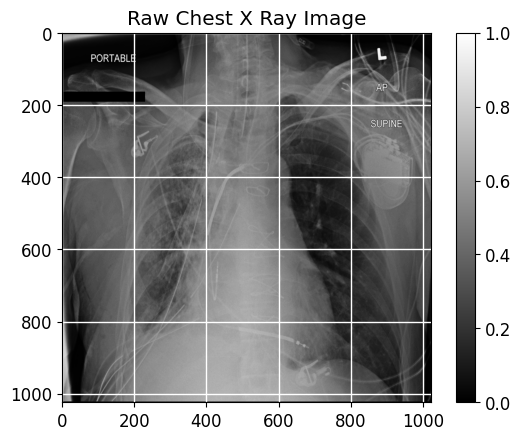

In [ ]:
# Get the first image that was listed in the train_df dataframe
sample_img = train_df.Image[0]
raw_image = plt.imread(os.path.join(path_to_images, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.grid(color='w', linestyle='-', linewidth=1)
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

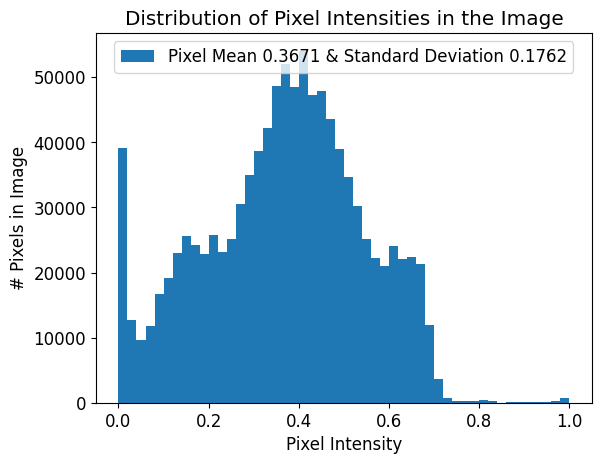

In [ ]:
pixels = np.reshape(raw_image,raw_image.shape[0]*raw_image.shape[1])
plt.hist(pixels, bins=50, label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}')
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')
plt.show()

In [ ]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    """
    Return generator for training set, normalizing using batch
    statistics.

    Args:
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.

    Returns:
        train_generator (DataFrameIterator): iterator over training set
    """
    print("getting train generator...")
    # Normalize images  --- Generate batches of tensor image data with real-time data augmentation
    image_generator = ImageDataGenerator(
        samplewise_center=True,              #Set each sample mean to 0
        samplewise_std_normalization= True)  # Divide each input by its standard deviation


    generator = image_generator.flow_from_dataframe(
            dataframe=df1,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",       #  Mode for yielding the targets, one of "binary", "categorical", "input", "multi_output", "raw", sparse" or None. Default: "categorical".
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))

    return generator

In [ ]:
def get_test_and_valid_generator(valid_df, test_df, train_df, image_dir, x_col, y_cols, sample_size=100, batch_size=8,
                                 seed=1, target_w = 320, target_h = 320):
    """
    Return generator for validation set and test test set using
    normalization statistics from training set.

    Args:
      valid_df (dataframe): dataframe specifying validation data.
      test_df (dataframe): dataframe specifying test data.
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      sample_size (int): size of sample to use for normalization statistics.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.

    Returns:
        test_generator (DataFrameIterator) and valid_generator: iterators over test set and validation set respectively
    """
    # get generator to sample dataset
    print(f"\nextracting {sample_size} train images to normalize validation and test datasets...")

    raw_train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe=train_df,
        directory=IMAGE_DIR,
        x_col="Image",
        y_col=labels,
        class_mode="raw",
        batch_size=sample_size,
        shuffle=True,
        target_size=(target_w, target_h))

    # get data sample
    batch = raw_train_generator.next() # generate a batch of samples and associated labels
    data_sample = batch[0]             # => we need only the sample imgs ie batch[0]

    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)

    # fit generator to sample from training data - we use this generator normalizing mean and std using the train sample of 100
    image_generator.fit(data_sample)

    print("\ngetting valid generator...")

    # get test generator
    valid_generator = image_generator.flow_from_dataframe(
            dataframe=valid_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))

    print("\ngetting test generator...")
    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    return valid_generator, test_generator

In [ ]:
labels = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
              'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation']
IMAGE_DIR = path_to_images
train_generator = get_train_generator(train_df, IMAGE_DIR, "Image", labels)
valid_generator, test_generator= get_test_and_valid_generator(val_df, test_df, train_df, IMAGE_DIR, "Image", labels)

getting train generator...
Found 5606 validated image filenames.

extracting 100 train images to normalize validation and test datasets...
Found 3924 validated image filenames.

getting valid generator...
Found 560 validated image filenames.

getting test generator...
Found 1122 validated image filenames.


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 2.5499 and the minimum is -3.3025
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


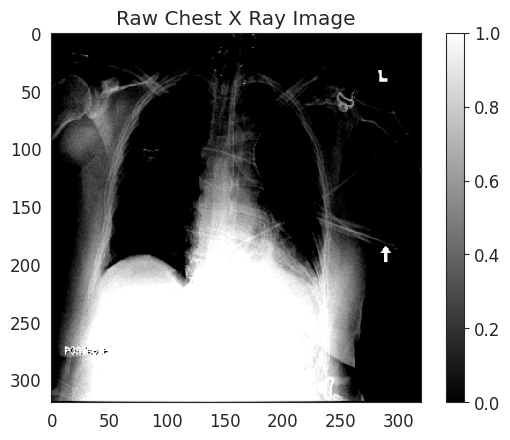

In [ ]:
import seaborn as sns
# Plot a processed image
sns.set_style("white")
generated_image, label = train_generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

In [ ]:
print(generated_image.shape, generated_image[0].shape)
print(raw_image.shape)

(8, 320, 320, 3) (320, 320, 3)
(1024, 1024)


<ipython-input-35-30006afcf9d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),
<ipython-input-35-30006afcf9d9>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image[0].ravel(),


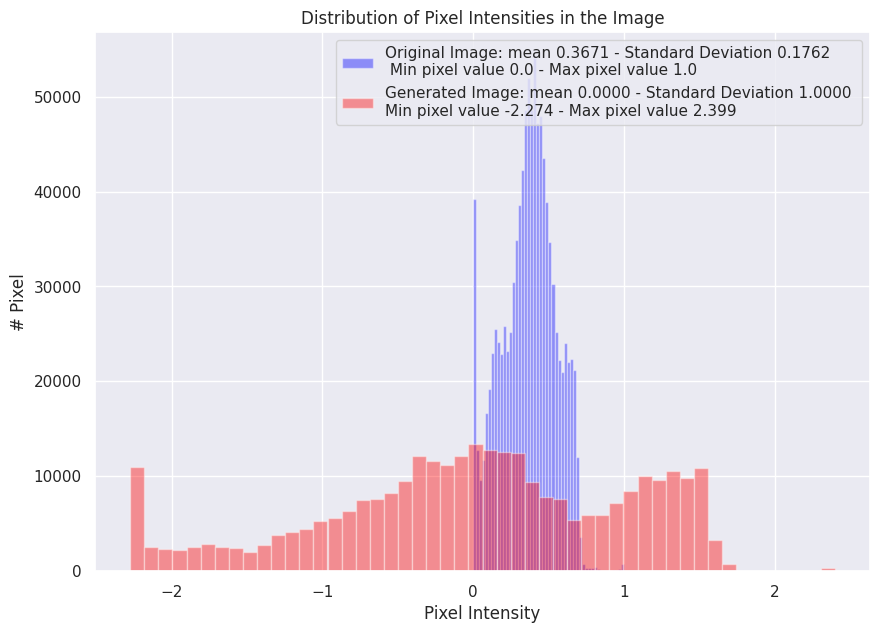

In [ ]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(),
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue',
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(),
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}',
             color='red',
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')
plt.show()

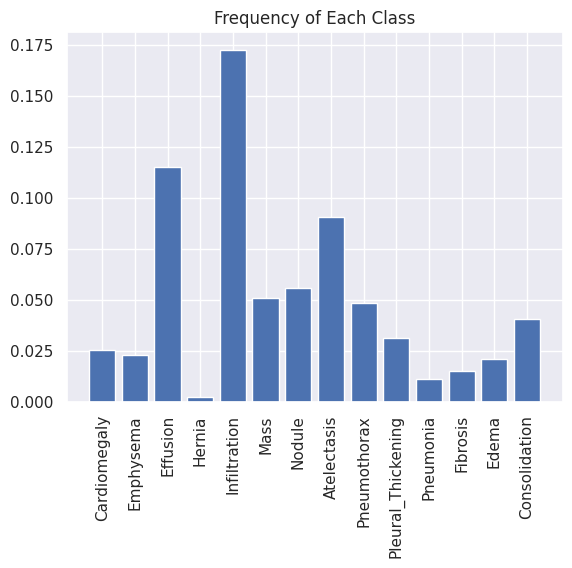

In [ ]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(train_generator.labels, axis=0))
plt.title("Frequency of Each Class")
plt.show()

In [ ]:
def compute_class_freqs(labels):
    """
    Compute positive and negative frequences for each class.

    Args:
        labels (np.array): matrix of labels, size (num_examples, num_classes)
    Returns:
        positive_frequencies (np.array): array of positive frequences for each
                                         class, size (num_classes)
        negative_frequencies (np.array): array of negative frequences for each
                                         class, size (num_classes)
    """
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # total number of patients (rows)
    N = labels.shape[0]

    positive_frequencies = np.sum(labels, axis=0)/N
    negative_frequencies = (N - np.sum(labels, axis=0))/N  # broadcasting of N to a line vector of dim num_classes

    ### END CODE HERE ###
    return positive_frequencies, negative_frequencies

In [ ]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)
freq_pos

array([0.02515162, 0.0226543 , 0.11487692, 0.00231894, 0.17249376, 0.05066001, 0.05583304, 0.0906172 , 0.04834106, 0.03139493, 0.01105958, 0.01498395, 0.02104888, 0.04031395])

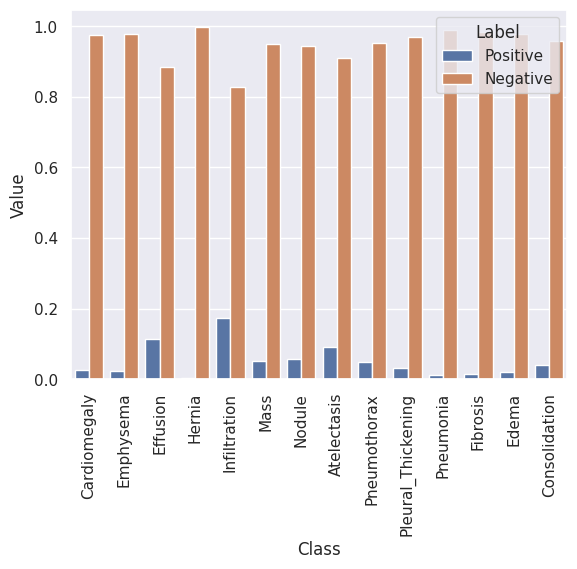

In [ ]:
# Use the concat function instead of append
df1 = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})
df2 = pd.DataFrame([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)])
df1 = pd.concat([df1, df2], ignore_index=True)

plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=df1)

In [ ]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights
neg_contribution = freq_neg * neg_weights

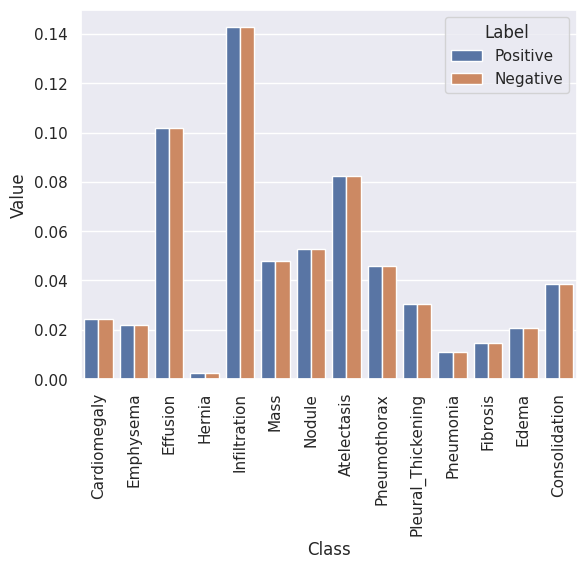

In [ ]:
# Use the concat function instead of append
df1 = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": pos_contribution})
df2 = pd.DataFrame([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(neg_contribution)])
df1 = pd.concat([df1, df2], ignore_index=True)

plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=df1)

In [ ]:
from tensorflow.keras.applications import DenseNet121

# Ensure the file path is correct
weights_path = '/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/densenet.hdf5'

# Verify that the file exists
import os
if os.path.exists(weights_path):
    print("Weights file found.")
else:
    print("Weights file not found. Please check the file path.")

# Load the model with custom weights
try:
    model = DenseNet121(weights=weights_path, include_top=False)
    print("Model loaded successfully with custom weights.")
except Exception as e:
    print(f"Error loading model: {e}")


Weights file found.
Model loaded successfully with custom weights.


In [ ]:
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, None, None, 3)        0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']

In [ ]:
import tensorflow.keras.backend as K
import tensorflow as tf

def weighted_loss(y_true, y_pred, pos_weights, neg_weights, epsilon=1e-7):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    pos_weights = tf.cast(pos_weights, tf.float32)
    neg_weights = tf.cast(neg_weights, tf.float32)

    loss = 0.0
    for i in range(len(pos_weights)):
        loss += - pos_weights[i] * K.mean(y_true[:, i] * K.log(y_pred[:, i] + epsilon)) \
                - neg_weights[i] * K.mean((1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
    return loss





In [ ]:
import keras
from keras.applications.densenet import DenseNet121
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from keras.preprocessing import image
import numpy as np

import keras.backend as K

# Function to load the DenseNet121 model with custom weights
def load_C3M3_model():

    class_pos = train_df.loc[:, labels].sum(axis=0)
    class_neg = len(train_df) - class_pos
    class_total = class_pos + class_neg

    pos_weights = class_pos / class_total
    neg_weights = class_neg / class_total
    print("Got loss weights")
    # create the base pre-trained model
    base_model = DenseNet121(weights=weights_path, include_top=False)
    print("Loaded DenseNet")
    # add a global spatial average pooling layer
    x = base_model.layers[-2].output
    x = GlobalAveragePooling2D()(x)
    # and a logistic layer
    predictions = Dense(len(labels), activation="sigmoid")(x)
    print("Added layers")

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer='adam', loss=lambda y_true, y_pred: weighted_loss(y_true, y_pred, pos_weights, neg_weights))
    print("Compiled Model")

    try:
      model.load_weights(weights_path, by_name=True, skip_mismatch=True)
      print("Weights loaded successfully.")
    except Exception as e:
      print(f"Error loading weights: {e}")

# Print model summary to verify the layer count and architecture
    model.summary()

    return model


# Model checkpoint
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# CSV Logger
csv_logger = CSVLogger('training_log.csv')

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

# Early stopping to stop training when a monitored metric has stopped improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# TensorBoard for visualizing the training process
tensorboard = TensorBoard(log_dir='./logs')

# Load the model
model = load_C3M3_model()



Got loss weights
Loaded DenseNet
Added layers
Compiled Model
Weights loaded successfully.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, None, None, 3)        0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 con

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=10,
    validation_steps=50,
    callbacks=[checkpoint, csv_logger, reduce_lr, early_stopping, tensorboard]
)

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.3572 
Epoch 1: val_loss improved from inf to 79.80639, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 262s 28s/step - loss: 0.3572 - val_loss: 79.8064 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.2928 
Epoch 2: val_loss improved from 79.80639 to 69.98765, saving model to best_model.h5
10/10 [==============================] - 268s 28s/step - loss: 0.2928 - val_loss: 69.9876 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.3584 
Epoch 3: val_loss improved from 69.98765 to 37.08226, saving model to best_model.h5
10/10 [==============================] - 258s 27s/step - loss: 0.3584 - val_loss: 37.0823 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.2859 
Epoch 4: val_loss improved from 37.08226 to 11.18951, saving model to best_model.h5
10/10 [==============================] - 268s 28s/step - loss: 0.2859 - val_loss: 11.1895 - lr: 0.0010
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.3753 
Epoch 5: val_loss improved from 

In [ ]:
# Convert the history.history dict to a DataFrame
history_df = pd.DataFrame(history.history)

# Save the DataFrame to a CSV file
history_df.to_csv('/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample/training_results.csv', index=False)

print("Training results saved to training_results.csv")

Training results saved to training_results.csv


In [ ]:
# Save the final model
model.save("final_model.h5")
print("Model training complete and saved as 'final_model.h5'")

# Saving the final model
model.save("/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample/final_model.h5")
print("Model training complete and saved as 'final_model.h5'")

Model training complete and saved as 'final_model.h5'
Model training complete and saved as 'final_model.h5'


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.692339 to fit



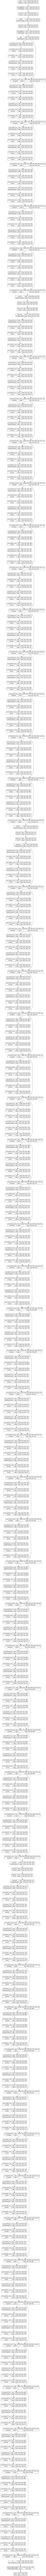

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/gdrive/MyDrive/NIH_chestxray_Sample_dataset/sample/sample/model_diagram.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Print out the total number of layers
layers_ = model.layers
print('total number of layers =',len(layers_))

total number of layers = 428


In [ ]:
from tensorflow.keras.metrics import AUC, Precision, Recall

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score, accuracy_score

class MetricsCallback(Callback):
    def __init__(self, validation_data, batch_size=32):
        super(MetricsCallback, self).__init__()
        self.validation_data = validation_data
        self.batch_size = batch_size

    def on_epoch_end(self, epoch, logs=None):
        val_true = []
        val_pred = []
        for batch in self.validation_data:
            x_val, y_val = batch
            y_pred = np.argmax(self.model.predict(x_val), axis=-1)
            y_true = np.argmax(y_val, axis=-1)
            val_true.extend(y_true)
            val_pred.extend(y_pred)

        val_true = np.array(val_true)
        val_pred = np.array(val_pred)

        val_f1 = f1_score(val_true, val_pred, average='macro')
        val_accuracy = accuracy_score(val_true, val_pred)

        logs['val_f1'] = val_f1
        logs['val_accuracy'] = val_accuracy

        print(f' — val_f1: {val_f1:.4f} — val_accuracy: {val_accuracy:.4f}')

        # Save logs to a CSV file
        logs_df = pd.DataFrame(logs, index=[epoch])
        logs_df.to_csv('metrics_log.csv', mode='a', header=not bool(epoch))

# Usage in model.fit
metrics_callback = MetricsCallback(validation_data=valid_generator)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=10,
    validation_steps=50,
    callbacks=[checkpoint, csv_logger, reduce_lr, early_stopping, tensorboard, metrics_callback]
)


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 1.7756 - accuracy: 0.2375 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 1: val_loss did not improve from 0.40363
1/1 [==============================] - 2s 2s/step


In [ ]:
learn.loss_func

FlattenedLoss of BCEWithLogitsLoss()

In [ ]:
learn.opt_func

<function fastai.optimizer.Adam(params: 'Tensor | Iterable', lr: 'float | slice', mom: 'float' = 0.9, sqr_mom: 'float' = 0.99, eps: 'float' = 1e-05, wd: 'Real' = 0.01, decouple_wd: 'bool' = True) -> 'Optimizer'>

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
learn.export("multicatcxr6.pkl")

In [ ]:
dls.vocab

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

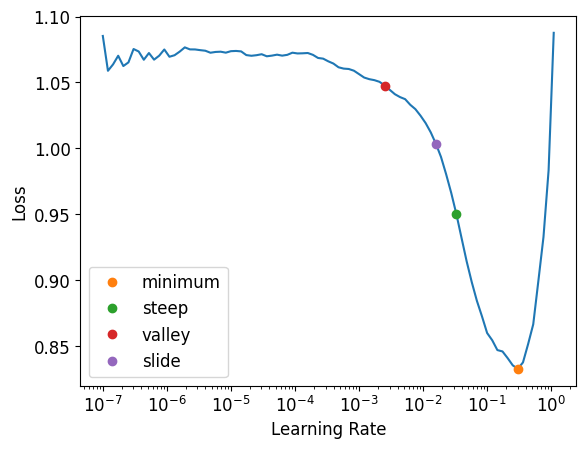

In [ ]:
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
lrs.valley

0.002511886414140463

In [ ]:
learn.fit_one_cycle(5,3e-3)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6,lr_max=slice(1e-5,5e-3))

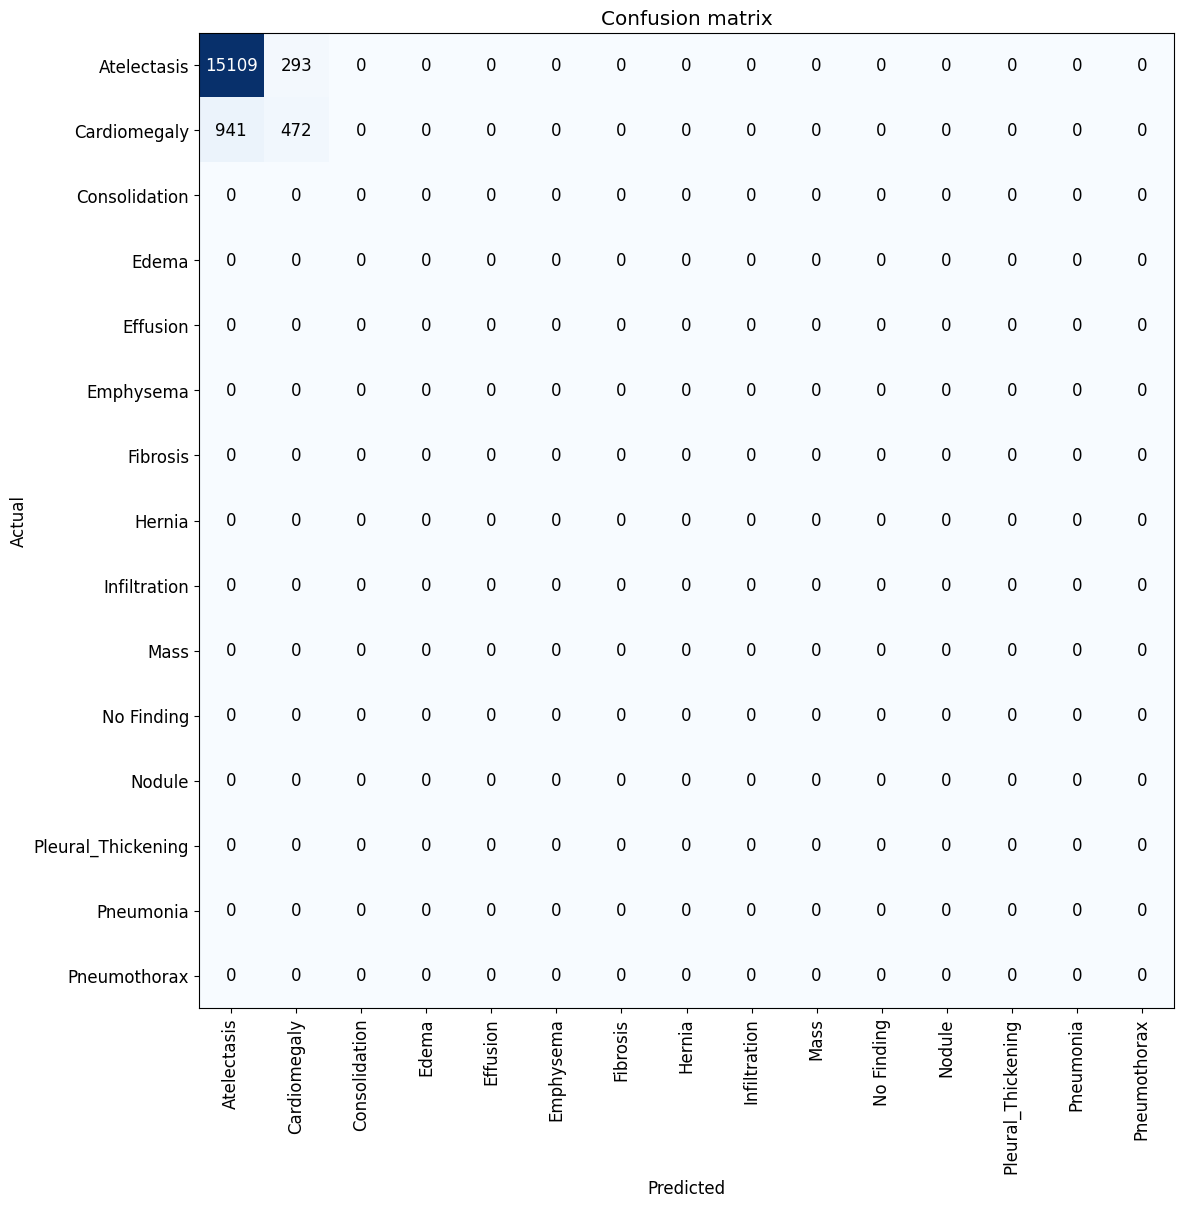

In [ ]:

interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12))

In [ ]:
x = dls.vocab
image = (path/'sample/images/00000181_035.png')     # infilteration is ground truth
def match(raw, vocab):
    return [[vocab[0],(raw[0].item()*100)],[vocab[1],(raw[1].item()*100)],[vocab[2],(raw[2].item()*100)],[vocab[3],(raw[3].item()*100)],[vocab[4],(raw[4].item()*100)],[vocab[5],(raw[5].item()*100)],[vocab[6],(raw[6].item()*100)],[vocab[7],(raw[7].item()*100)],[vocab[8],(raw[8].item()*100)],[vocab[9],(raw[9].item()*100)],[vocab[10],(raw[10].item()*100)],[vocab[11],(raw[11].item()*100)],[vocab[12],(raw[12].item()*100)],[vocab[13],(raw[13].item()*100)],[vocab[14],(raw[14].item()*100)]]
def list_preds(img_path):
  prediction, indice, losses = learn.predict(img_path)
  arr = match(losses, x)
  return(arr)
list_preds(image)

[['Atelectasis', 6.985398381948471],
 ['Cardiomegaly', 2.280963398516178],
 ['Consolidation', 10.139761865139008],
 ['Edema', 5.934232473373413],
 ['Effusion', 37.846142053604126],
 ['Emphysema', 0.40620374493300915],
 ['Fibrosis', 0.8101838640868664],
 ['Hernia', 0.013159187801647931],
 ['Infiltration', 49.632468819618225],
 ['Mass', 7.135086506605148],
 ['No Finding', 14.71804529428482],
 ['Nodule', 7.250111550092697],
 ['Pleural_Thickening', 6.765247136354446],
 ['Pneumonia', 1.24263484030962],
 ['Pneumothorax', 2.6641270145773888]]

In [ ]:
y = list_preds(image)
for i in range(len(y)):
  temp = y[i][1]
  if(temp)>15:
    print (y[i])

['Effusion', 37.846142053604126]
['Infiltration', 49.632468819618225]


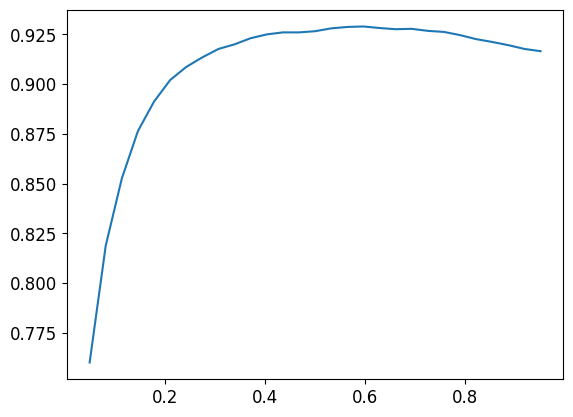

In [ ]:
preds,targs = learn.get_preds()
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
list_preds(img)

[['Atelectasis', 31.782570481300354],
 ['Cardiomegaly', 0.68107177503407],
 ['Consolidation', 5.9052880853414536],
 ['Edema', 1.9054615870118141],
 ['Effusion', 11.331857740879059],
 ['Emphysema', 0.9489145129919052],
 ['Fibrosis', 1.0270885191857815],
 ['Hernia', 0.5155957769602537],
 ['Infiltration', 18.426556885242462],
 ['Mass', 3.2539591193199158],
 ['No Finding', 47.051453590393066],
 ['Nodule', 1.7752323299646378],
 ['Pleural_Thickening', 2.8886862099170685],
 ['Pneumonia', 0.9141155518591404],
 ['Pneumothorax', 4.8490457236766815]]

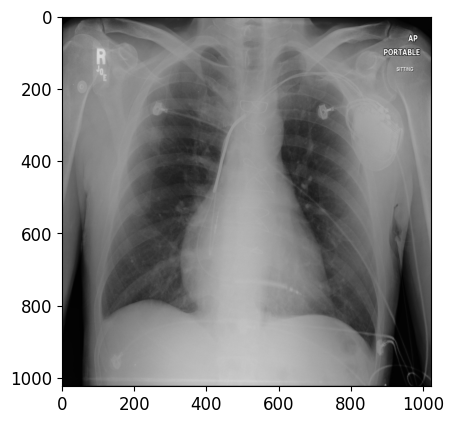

In [ ]:
plt.imshow(img)

In [ ]:
li = list_preds(img)
sorted(li,key=lambda x: x[1], reverse = True)

[['No Finding', 47.051453590393066],
 ['Atelectasis', 31.782570481300354],
 ['Infiltration', 18.426556885242462],
 ['Effusion', 11.331857740879059],
 ['Consolidation', 5.9052880853414536],
 ['Pneumothorax', 4.8490457236766815],
 ['Mass', 3.2539591193199158],
 ['Pleural_Thickening', 2.8886862099170685],
 ['Edema', 1.9054615870118141],
 ['Nodule', 1.7752323299646378],
 ['Fibrosis', 1.0270885191857815],
 ['Emphysema', 0.9489145129919052],
 ['Pneumonia', 0.9141155518591404],
 ['Cardiomegaly', 0.68107177503407],
 ['Hernia', 0.5155957769602537]]